<h1 style='text-align: center; color: lightblue; font-size: 40px'> Neural Nets from scratch </h1>
<h2 style='text-align: center; color: lightblue; font-size: 30px'> Linear regression </h2>

In [ ]:
import pandas as pd
import numpy as np
import torch
import math
from functools import partial
import matplotlib.pyplot as plt

# who knows how to perform linear regression using gradient descent ?
Figure together the pseudo code

#Pseudo code:
#get the data
#initialize the weights
#train
    #make predictions
    #calculate loss (erreur)
    #back propagation = on répercute la loss sur les poids du modèle
    #update weights

# who can code it ? 
Create data that follow the function y=3x+2. Then figure a way to find back these parameters using gradient descent.

## Help: math equations for gradient calculation

\begin{array}{c}
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-(a x_{i} + b ) \right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-a x_{i} - b\right)^{2}}
\end{array}




\begin{aligned}
\frac{\partial M S E}{\partial a} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot(-1)=-2 \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)* \\
\frac{\partial M S E}{\partial b} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial b}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot\left(-x_{i}\right)=-2 \frac{1}{N} \sum_{i=1}^{N} x_{i}\left(y_{i}-\hat{y}_{i}\right) **
\end{aligned}
*the mean of errors

\**the mean of (errors * xi)

## Numpy solution

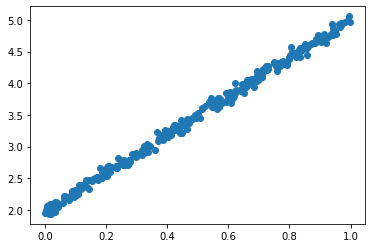

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# get data
x = np.random.rand(300)
y = 3 * x + 2 + (np.random.randn(300) * 0.05)

plt.scatter(x, y)

In [ ]:
# Your code here

In [ ]:
import torch
# initialize parameters (at first, we believe a=1 and b=1)
a = 1 
b = 1

# train:
for epoch in range(2000):
    # make predictions
    y_hat = a*x + b

    # compute the loss
    errors = y - y_hat
    loss = np.sum(errors**2)/len(errors)

    # print the loss to ensure training is going well:
    if epoch % 100 == 0:
        print(loss)

    # backpropagate the loss
    # pytorch : librairie avec de la différenciation automatique (utiliser ça pour les formules)
    a_grad = (-2 / len(errors)) * np.sum(errors)
    b_grad = (-2 / len(errors)) * np.sum(x * errors) 

    # update parameters
    a -= a_grad * 0.001  # Try with and without the learning rate ;)
    b -= b_grad * 0.001

4.34473785846436
2.8211718836178274
1.8325773629038762
1.1911208855555189
0.7749194599599485
0.5048845932216214
0.3296966704834541
0.21605499585653065
0.14235115182993613
0.09456371218811523
0.06359436665650284
0.043539361679554515
0.03056785749551364
0.022194106486060274
0.016805177797632975
0.01335450311392453
0.011163021941100896
0.009790147028423301
0.008950035304125989
0.008457257060687121


In [ ]:

# Your a and b shouldn't be too far of 3 and 2
print(a, b)

2.7759225036225175 2.1002221067096603


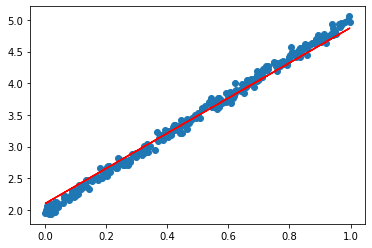

In [ ]:
y_pred = a * x + b
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")